In [69]:

import numpy as np
import pandas as pd
import plotly 
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [70]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [71]:
data.head()

f1            f2        f3    y
0  -195.871045 -14843.084171  5.532140  1.0
1 -1217.183964  -4068.124621  4.416082  1.0
2     9.138451   4413.412028  0.425317  0.0
3   363.824242  15474.760647  1.094119  0.0
4  -768.812047  -7963.932192  1.870536  0.0

In [72]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [73]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [74]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


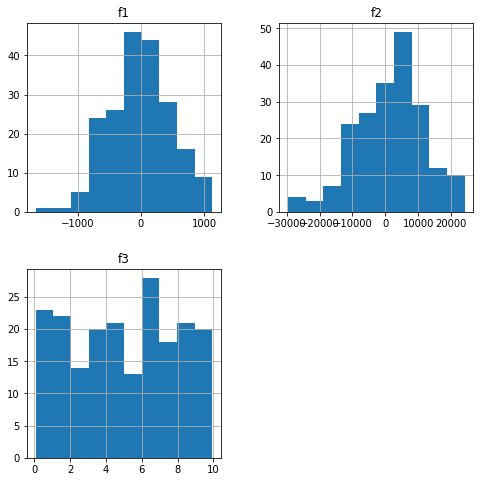

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data[['f1','f2','f3']].hist(ax=ax)
plt.show()

# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

# Task-1

# 1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance

In [76]:
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss = 'log')
model.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
model.coef_

array([[ 3910.42216123,  9384.68885971, 10224.61377762]])

OBSERVATION:-
Since in weight vector weight corresponding to feature 'f1' and feature 'f2' are much higher than feature 'f3'.Therefore features 'f1' and 'f2' are important and least important feature is 'f3'.

# 2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

In [78]:
model = SGDClassifier(loss = 'hinge')
model.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
model.coef_

array([[ 7511.7935189 , -4766.40305652, 10320.59884591]])

OBSERVATION:-
For this model feature 'f1' has more positive value than feature 'f3',therefore 'f1' is more important than feature 'f3'. The Value of feature 'f2' is more negative than the positive value of 'f3',hence 'f2' is also a important feature in determining a point as negative class.Therefore importanat features are 'f1' and 'f3'.

# Task2:-

# 1.Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [80]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [81]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss = 'log')
model.fit(scaled_data,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
model.coef_

array([[-0.98074347,  1.54488696, 20.69181997]])

OBSERVATION:-
For this model most important feature is 'f3',as it's corresponding weight vector is highest among all the features.If we have to choose 2nd most important feature,then it would be 'f1',as it has highest negative value.

# 2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [83]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss = 'hinge')
model.fit(scaled_data,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
model.coef_

array([[-0.09218478,  1.90042984, 13.17504848]])

OBSERVATION:-¶
Most important features are 'f3' and 'f2',as thier corresponding weight values are higher and hence will correspond more in identifying a query point as positive or negative.